In [192]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [131]:
confirmed = pd.read_csv("data/time_series_19-covid-Confirmed.csv")
recovered = pd.read_csv("data/time_series_19-covid-Recovered.csv")
deaths = pd.read_csv("data/time_series_19-covid-Deaths.csv")
covid19 = pd.read_csv("data/covid_19_clean_complete.csv", parse_dates=['Date'])
population = pd.read_csv("data/population_clean.csv")

# Preprocessing

In [132]:
countries = all_covid19['Country/Region'].unique()
all_covid19 = covid19.sort_values(['Date','Country/Region','Province/State'])
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Confirmed', 'Deaths', 'Recovered']] = all_covid19[['Confirmed', 'Deaths', 'Recovered']].fillna(0)




[all_covid19['Date'] == all_covid19['Date'].max()]

covid19_today_regions = all_covid19[all_covid19['Date'] == all_covid19['Date'].max()]
covid19_today = covid19_today_regions.groupby('Country/Region').sum()[['Confirmed', 'Deaths', 'Recovered']]
covid19_today['PercDeath'] = 100 * covid19_today['Deaths'] / covid19_today['Confirmed']

population = population[['Country Name', '2018']]
pops = [population[population['Country Name'] == c]['2018'].values for c in countries]
pops = [p[0] if len(p) > 0 else None for p in pops]
covid19_today["Population"] = pops


covid19_today.tail()





,Confirmed,Deaths,Recovered,PercDeath,Population
Country/Region,,,,,
US,2384,68,19,2.852349,327167434.0
Ukraine,1,0,0,0.000000,44622516.0
United Arab Emirates,74,0,17,0.000000,9630959.0
United Kingdom,459,8,19,1.742919,66488991.0
Vietnam,38,0,16,0.000000,95540395.0


# World analysis

### Stats

In [154]:
print("Total number of confirmed cases:", covid19_today.sum()['Confirmed'])
print("Total number of deaths:", covid19_today.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today.sum()['Deaths'] / covid19_today.sum()['Confirmed']))

Total number of confirmed cases: 126968.0
Total number of deaths: 4647.0
Total number of recovered cases: 67014.0
% of death: 3.659977317119274%


In [159]:
# There is a cruiser ship with 696 cases and 7 deaths, that's why I removed 1
print("Number of countries with at least one case:", len(covid19_today)-1)
print("Number of countries with at least 100 case:", len(covid19_today[covid19_today['Confirmed'] > 100])-1)
print("Number of countries with at least 1 death:", len(covid19_today[covid19_today['Deaths'] > 1])-1)

Number of countries with at least one case: 113
Number of countries with at least 100 case: 24
Number of countries with at least 1 death: 17


#### Outside China

In [171]:
covid19_today_no_china = covid19_today.drop('China')
print("Total number of confirmed cases:", covid19_today_no_china.sum()['Confirmed'])
print("Total number of deaths:", covid19_today_no_china.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today_no_china.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today_no_china.sum()['Deaths'] / covid19_today_no_china.sum()['Confirmed']))

Total number of confirmed cases: 46047.0
Total number of deaths: 1486.0
Total number of recovered cases: 5370.0
% of death: 3.227%


## Confirmed case per day

#### World

([<matplotlib.axis.XTick at 0x7fee7b2b4048>,
 <a list of 6 Text xticklabel objects>)

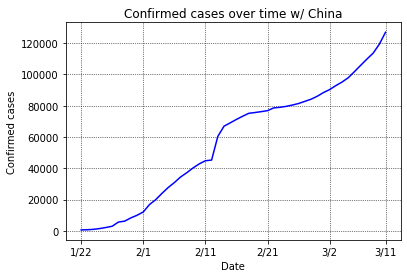

In [243]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases in world over time")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

#### Without China

([<matplotlib.axis.XTick at 0x7fee7b5259b0>,
 <a list of 6 Text xticklabel objects>)

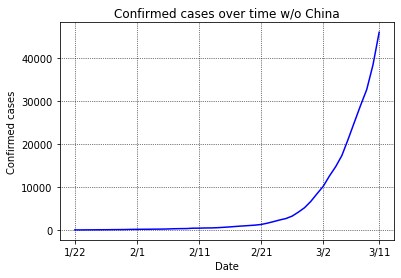

In [244]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_no_china["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time w/o China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_no_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_no_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

#### Only China

([<matplotlib.axis.XTick at 0x7fee7b98d198>,
 <a list of 6 Text xticklabel objects>)

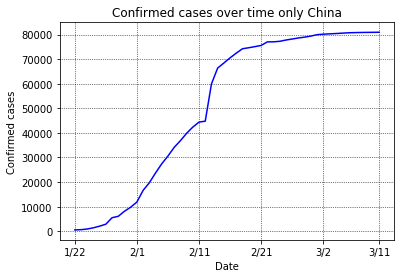

In [245]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_china["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time only in China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## Deaths per day

### World

([<matplotlib.axis.XTick at 0x7fee7e6644a8>,
 <a list of 6 Text xticklabel objects>)

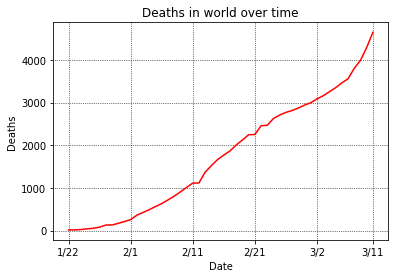

In [247]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths in world over time")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

### World without China

([<matplotlib.axis.XTick at 0x7fee7b63d208>,
 <a list of 6 Text xticklabel objects>)

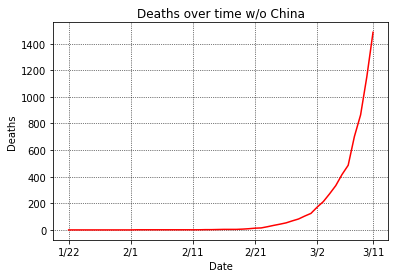

In [249]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_no_china["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths over time w/o China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_no_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_no_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

### Only in China

([<matplotlib.axis.XTick at 0x7fee7af176d8>,
 <a list of 6 Text xticklabel objects>)

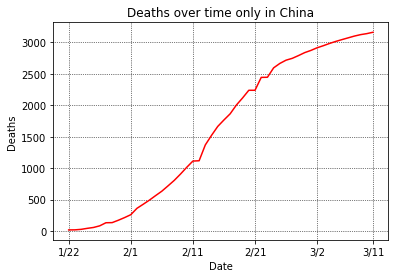

In [251]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_china["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths over time only in China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## Top 15 infected countries

In [284]:
# covid19_today = covid19_today.drop('Cruise Ship')
top_15 = covid19_today.sort_values('Confirmed', ascending=False)[:15]
top_15['PercPop'] = 100 * top_15['Confirmed'] / top_15['Population']
top_15.drop(columns=['Population'], inplace=True)
# top_15.to_markdown()
top_15



,Confirmed,Deaths,Recovered,PercDeath,PercPop
Country/Region,,,,,
China,80921,3161,61644,3.906279,0.005810
Italy,12462,827,1045,6.636174,0.020622
Iran,9000,354,2959,3.933333,0.011002
"Korea, South",7755,60,288,0.773694,0.015019
US,2384,68,19,2.852349,0.000729
...,...,...,...,...,...
Norway,598,0,1,0.000000,0.011253
Netherlands,503,5,0,0.994036,0.002919
Sweden,500,1,1,0.200000,0.004910


## Countries with more than 100 confirmed case and without deaths

In [289]:
no_death = covid19_today[(covid19_today['Deaths'] == 0) & (covid19_today['Confirmed'] > 100)]
no_death.drop(columns=['PercDeath', 'Population'])

,Confirmed,Deaths,Recovered
Country/Region,,,
Austria,246,0,4
Bahrain,195,0,35
Denmark,444,0,1
Israel,109,0,4
Malaysia,149,0,26
Norway,598,0,1
Qatar,262,0,0
Singapore,178,0,96


# Countries

## Italy

([<matplotlib.axis.XTick at 0x7fee7a2bdeb8>,
 <a list of 6 Text xticklabel objects>)

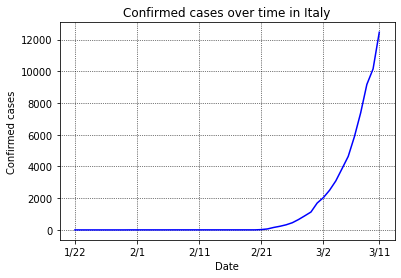

In [337]:
fig, ax = plt.subplots()
italy = all_covid19[all_covid19['Country/Region'] == 'Italy']
italy = italy.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(italy["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Italy")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(covid19_per_date_china)-1)
ticks_name = ["{}/{}".format(covid19_per_date_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)


# ax.scatter(32, 62, s=25, c="blue")
# ax.scatter(fpr_odin[idx_tpr_95_odin], tpr_odin[idx_tpr_95_odin], s=100, c="blue")
# ax.scatter(fpr_base[idx_tpr_95_base], tpr_base[idx_tpr_95_base], s=100, c="red")
# ax.annotate("TPR=95%", (fpr_proposed[idx_tpr_95_proposed]-0.07, tpr_proposed[idx_tpr_95_proposed]+0.05))

([<matplotlib.axis.XTick at 0x7fee7a5312e8>,
 <a list of 6 Text xticklabel objects>)

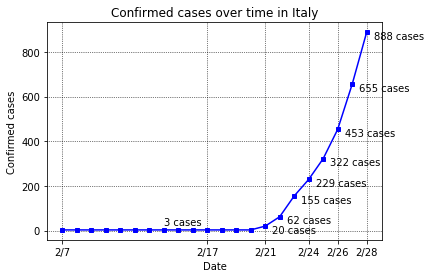

In [437]:
fig, ax = plt.subplots()
x = italy[(italy["Confirmed"] > 2) & (italy["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

ax.annotate("3 cases", (7, 26))
for i, j in enumerate(x[14:]):
    ax.annotate("{} cases".format(j), (14.5+i, j-30))
    


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Italy")
ticks_pos = [0, 10, 14, 17, 19, 21]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## France

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,2,0,0
2020-01-25,3,0,0
2020-01-26,3,0,0
...,...,...,...
2020-03-07,952,11,12
2020-03-08,1129,19,12
2020-03-09,1212,19,12


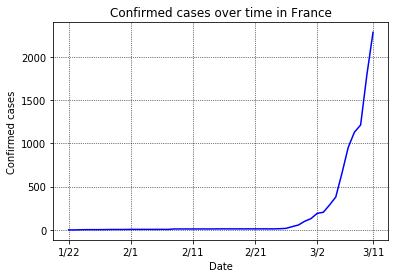

In [441]:
fig, ax = plt.subplots()
france = all_covid19[all_covid19['Country/Region'] == 'France']
france = france.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(france["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in France")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(france)-1)
ticks_name = ["{}/{}".format(france.iloc[i].name.to_pydatetime().month, 
                             france.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)


# ax.scatter(32, 62, s=25, c="blue")
# ax.scatter(fpr_odin[idx_tpr_95_odin], tpr_odin[idx_tpr_95_odin], s=100, c="blue")
# ax.scatter(fpr_base[idx_tpr_95_base], tpr_base[idx_tpr_95_base], s=100, c="red")
# ax.annotate("TPR=95%", (fpr_proposed[idx_tpr_95_proposed]-0.07, tpr_proposed[idx_tpr_95_proposed]+0.05))

IndexError: index 14 is out of bounds for axis 0 with size 11

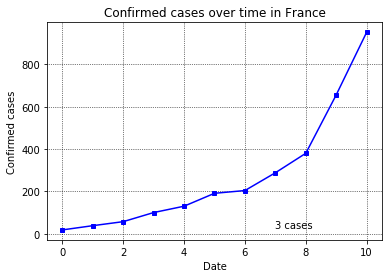

In [445]:
fig, ax = plt.subplots()
x = france[(france["Confirmed"] > 15) & (france["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

ax.annotate("3 cases", (7, 26))
for i, j in enumerate(x[14:]):
    ax.annotate("{} cases".format(j), (14.5+i, j-30))
    


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in France")
ticks_pos = [0, 10, 14, 17, 19, 21]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)